# 선형 회귀
y = wx의 형태를 갖는 간단한 선형 회귀를 실습해보겠습니다.

In [1]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


# 데이터 생성하기
numpy를 활용하여 간단하게 선형 회귀 데이터를 생성합니다.  
x값에 따른 y값은 해당 x값에 랜덤 노이즈를 더하여, 회귀 계산에 적합한 분포의 데이터로 생성합니다.

In [2]:
X = np.linspace(0, 10, 10)
Y = X + np.random.randn(*X.shape)

# 데이터 조회
아래의 코드를 통해 임의로 생성된 데이터를 조회할 수 있습니다.  
하나의 함수로 얻을 수 없는, x에 해당하는 y값을 볼 수 있습니다.  
선형 회귀를 통해, 아래 데이터 분포에 가장 적합한 (약간의 에러를 허용하는)  
w를 찾도록 하겠습니다.

In [3]:
for x, y in zip(X,Y):
    print((round(x,1), round(y,1)))

(0.0, -0.4)
(1.1, 2.3)
(2.2, 1.8)
(3.3, 3.4)
(4.4, 4.6)
(5.6, 4.2)
(6.7, 6.5)
(7.8, 7.4)
(8.9, 10.0)
(10.0, 9.8)


# 선형 회귀 모델 만들기
Keras의 Sequential을 사용하면, 단 몇줄로 선형 회귀 모델을 만들 수 있습니다.  

In [4]:
model = Sequential()
model.add(Dense(input_dim=1, units=1, activation="linear", use_bias=False))

경사하강법 (gradient descent)로 선형회귀 함수를 구합니다.  
learning rate은 0.01로 지정하였으며, 비용 함수는 평균 제곱 오차 (mse: Mean Squared Error)를 사용합니다.

In [5]:
sgd = optimizers.SGD(lr=0.05)
model.compile(optimizer='sgd', loss='mse')

선형 회귀 모델을 학습하기 전에, 먼저 최초로 설정된 w(기울기)를 조회해보도록 하겠습니다.

In [6]:
weights = model.layers[0].get_weights()
w = weights[0][0][0]

print('initial w is : ' + str(w))

initial w is : 1.6338617


# 선형 회귀 모델 학습
아래의 코드를 실행하여 학습합니다.  
총 10개의 데이터가 있으므로, batch_size를 10으로 설정하여 batch gradient descent를 실행합니다.  
epochs=10은 총 10번 반복 수행하여 모델을 학습한다는 뜻입니다.

In [7]:
model.fit(X, Y, batch_size=10,epochs=10, verbose=1)

Epoch 1/10
10/10 [==============================] - 0s 9ms/step - loss: 14.9644
Epoch 2/10
10/10 [==============================] - 0s 265us/step - loss: 1.7561
Epoch 3/10
10/10 [==============================] - 0s 248us/step - loss: 0.5965
Epoch 4/10
10/10 [==============================] - 0s 249us/step - loss: 0.4947
Epoch 5/10
10/10 [==============================] - 0s 332us/step - loss: 0.4858
Epoch 6/10
10/10 [==============================] - 0s 258us/step - loss: 0.4850
Epoch 7/10
10/10 [==============================] - 0s 400us/step - loss: 0.4849
Epoch 8/10
10/10 [==============================] - 0s 526us/step - loss: 0.4849
Epoch 9/10
10/10 [==============================] - 0s 516us/step - loss: 0.4849
Epoch 10/10
10/10 [==============================] - 0s 481us/step - loss: 0.4849


학습된 선형 회귀 모델의, w(기울기)를 조회해보도록 하겠습니다.

In [8]:
weights = model.layers[0].get_weights()
w = weights[0][0][0]

print('trained w is : ' + str(w))

trained w is : 0.99236614


# 선형회귀 시각화
아래의 코드를 선형 회귀 모델을 시각화할 수 있습니다.  
x값에 해당하는 선형 모델의 예측값이 우리가 랜덤으로 생성한 데이터 y와 상당히 비슷합니다.  
이처럼 관찰된 데이터를 통해 얻어진 데이터 분포의 패턴을 파악하는 것을 선형 회귀라 하며,    
이를 통해 관찰되지 않은 데이터에 대한 예측을 하는 것이 선형 회귀의 목적이라고 할 수 있습니다.

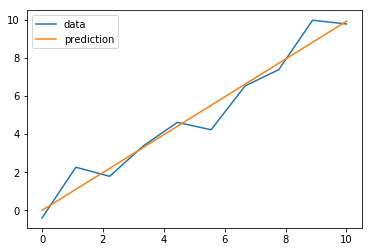

In [9]:
plt.plot(X, Y, label='data')
plt.plot(X, w*X, label='prediction')
plt.legend()
plt.show()